# Setting up Env.

In [56]:
# install spaCy, pyvis and pythonn-louvain
%%capture
!python3 -m spacy download en_core_web_sm
!pip install pyvis

In [57]:
# import Libs

import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import json

import matplotlib.pyplot as plt

In [58]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")
NER.max_length = 2000000

# Load books remotely, save them locally, apply NER to all books and explore the sample entities
## Total processing time will be 4-5 mins

In [59]:
import requests
import os

# GitHub repository and folder information
github_username = 'lunapapa-finland'
github_repo = 'EDISS-DS-MINI3'
folder_name = 'data'

# Construct the API URL
api_url = f'https://api.github.com/repos/{github_username}/{github_repo}/contents/{folder_name}'


# Send a GET request to the GitHub API
response = requests.get(api_url)

if response.status_code == 200:
    folder_contents = response.json()

    # Create a local directory to save the downloaded files
    local_directory = folder_name
    os.makedirs(local_directory, exist_ok=True)

    for item in folder_contents:
        if item['type'] == 'file':
            # Get the file name and download URL
            file_name = item['name']
            download_url = item['download_url']

            # Download the file and save it to the local directory 'data'
            response = requests.get(download_url)
            if response.status_code == 200:
                with open(os.path.join(local_directory, file_name), 'wb') as file:
                    file.write(response.content)
                print(f'Downloaded: {file_name}')
            else:
                print(f'Failed to download: {file_name}')
        else:
            print(f'Skipped: {item["name"]} (not a file)')
else:
    print(f'Failed to access folder. Status code: {response.status_code}')

Downloaded: Harry Potter 1.txt
Downloaded: Harry Potter 2.txt
Downloaded: Harry Potter 3.txt
Downloaded: Harry Potter 4.txt
Downloaded: Harry Potter 5.txt
Downloaded: Harry Potter 6.txt
Downloaded: Harry Potter 7.txt
Downloaded: harry-potter-characters.json


In [60]:
# Get all book files in the data directory entries
directory_path = 'data'
volumes = [b for b in os.scandir(directory_path) if b.name.endswith('.txt')]

# Sort DirEntry objects by name
volumes = sorted(volumes, key=lambda entry: entry.name)

# Print the sorted Books
for entry in volumes:
    print(entry.name)

Harry Potter 1.txt
Harry Potter 2.txt
Harry Potter 3.txt
Harry Potter 4.txt
Harry Potter 5.txt
Harry Potter 6.txt
Harry Potter 7.txt


In [61]:
# read books, employ NER and save them to a list of dictionaries
def read_books(volumes):
  nered_books = []
  for index, book in enumerate(volumes):
    book_text = open(book, encoding='utf-8', errors='replace').read()
    book_doc = NER(book_text)
    nered_books.append({"volume": (index + 1), "ner_content": book_doc})
  return nered_books

In [62]:
# NB it will take approximately 4-5 mins
# Read all books and NER them
nered_books = read_books(volumes)

In [63]:
# try to open the book 2 and see what entities will be recognized
displacy.render(nered_books[1]["ner_content"][0:200], style="ent", jupyter=True)

# load Characters from Json

In [64]:
# Read characters
characters = [b for b in os.scandir('data') if '.json' in b.name]
# Since there is only one json file containing character, we read_json using index [0]
character_df = pd.read_json(characters[0])
# Create new columns for first name and last name, since names in the books will most likely contain first names only.
character_df[['first name', 'last name']] = character_df['name'].str.split(' ', n=1, expand=True)
character_df.head(5)

,name,description,first name,last name
0,Hannah Abbott,Hufflepuff student in Harry Potter's year. Pre...,Hannah,Abbott
1,Ludo Bagman,Head of the Department of Magical Games and Sp...,Ludo,Bagman
2,Bathilda Bagshot,Author of A History of Magic,Bathilda,Bagshot
3,Katie Bell,Gryffindor Quidditch Chaser one year above Har...,Katie,Bell
4,Cuthbert Binns,ghost,Cuthbert,Binns


# Get Named Entity list per Sentence
## NB!!!! This took 51 mins to finish, that's why I saved them in to CSV. If you don't have time to test, please pass this block and Read them from CSV directly through next block!!!

## If you want to run this block, just uncommennt them

In [65]:

# # extracting entities per sentence
# def extract_entities(nered_books, sent_entity_collection):
#   # for every nered book
#   for nered_book in nered_books:
#     sent_entity_df = []
#     # Loop through sentences, store named entity list for each sentence
#     for sent in nered_book["ner_content"].sents:
#       entity_list = [ent.text for ent in sent.ents]
#       sent_entity_df.append({"sentence": sent, "entities": entity_list})
#     # save the results to datafram
#     sent_entity_df = pd.DataFrame(sent_entity_df)
#     # add df to collection/dictionary
#     sent_entity_collection[nered_book["volume"]] = sent_entity_df
#   return sent_entity_collection

In [66]:
# # NB!!!! This took 51 mins to finish, that's why I saved them in to CSV. If you want don't have time to test, please pass this block
# # and Read them from CSV!!!

# # creata a entity collection dictionary
# sent_entity_collection = {}
# # extract entities per sentence for all books
# sent_entity_collection = extract_entities(nered_books, sent_entity_collection)
# # Save result into json files
# for key,value in sent_entity_collection.items():
#   value.to_csv("volume" + str(key) + ".csv", index=False)


# Get Named Entity list per Sentence using Pre-processed Data


In [67]:
import requests
import os

# GitHub repository and folder information
github_username = 'lunapapa-finland'
github_repo = 'EDISS-DS-MINI3'
folder_name = 'preprocessed_data'

# Construct the API URL
api_url = f'https://api.github.com/repos/{github_username}/{github_repo}/contents/{folder_name}'


# Send a GET request to the GitHub API
response = requests.get(api_url)

if response.status_code == 200:
    folder_contents = response.json()

    # Create a local directory to save the downloaded files
    local_directory = folder_name
    os.makedirs(local_directory, exist_ok=True)

    for item in folder_contents:
        if item['type'] == 'file':
            # Get the file name and download URL
            file_name = item['name']
            download_url = item['download_url']

            # Download the file and save it to the local directory 'data'
            response = requests.get(download_url)
            if response.status_code == 200:
                with open(os.path.join(local_directory, file_name), 'wb') as file:
                    file.write(response.content)
                print(f'Downloaded: {file_name}')
            else:
                print(f'Failed to download: {file_name}')
        else:
            print(f'Skipped: {item["name"]} (not a file)')
else:
    print(f'Failed to access folder. Status code: {response.status_code}')

Downloaded: volume1.csv
Downloaded: volume2.csv
Downloaded: volume3.csv
Downloaded: volume4.csv
Downloaded: volume5.csv
Downloaded: volume6.csv
Downloaded: volume7.csv


In [68]:
# Get all nered volume files in the data directory entries
directory_path = 'preprocessed_data'
volumes = [b for b in os.scandir(folder_name) if b.name.endswith('.csv')]

# Sort DirEntry objects by name
volumes = sorted(volumes, key=lambda entry: entry.name)

# read entities per sentence in all volumes in to a dictionary
sent_entity_collection = {}
for index, volume in enumerate(volumes):
  sent_entity_collection[str(index+1)] = pd.read_csv(directory_path +'/' + volume.name)

# Filter out unnecessary entities recoginized by NER using character_entities in loaded DataFrame(Json)

In [69]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df['name'])
            or ent in list(character_df['first name'])]

In [70]:
%%capture
sent_entity_df_filtered_collection = {}
# for each book with NERed entities
for key,sent_entity_df in sent_entity_collection.items():
  # Apply filter_entity() to check whether the NER entity is in the character_df/charactoer Json file, Create another columnn to save the matched entities
  sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(eval(x), character_df))

  # Filter out sentences that don't have any character entities
  sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
  # Take only first name of filtered characters
  sent_entity_df_filtered_temp = sent_entity_df_filtered.copy()
  sent_entity_df_filtered.loc[:, 'character_entities'] = sent_entity_df_filtered_temp['character_entities'].apply(lambda x: [item.split()[0] for item in x])
  # Create sentence location for further usage
  sent_entity_df_filtered['sentence_location'] = sent_entity_df_filtered.index
  sent_entity_df_filtered = sent_entity_df_filtered.reset_index(drop=True)
  # add to dictionary
  sent_entity_df_filtered_collection[key] = sent_entity_df_filtered


# Create Relationships

In [71]:
def get_relationship(sent_entity_df_filtered):
  # scan the sent_entity_df_filtered, define the window size to 3, meaning that for every 3 rows,
  # if ever there are two different characters exist, record it.
  # note that it do not mean every 4 consecutive sentences since the sent_entity_df_filtered is filterred before.
  # The real ranking of the sentence is stored in column sentence_location
  window_size = 3
  sentence_distance = 40

  relationships = []
  # For every sentence
  for i in range(sent_entity_df_filtered.index[-1]):
      # define end_i between these minimum of i + window_size or the index of the last row.
      end_i = min(i+window_size, sent_entity_df_filtered.index[-1])
      # if the distance between last sentence and the first sentence is smaller than sentence_distance, we treat the blocks of sentences within
      # this window_size as a scenario, meaning that the relationships happened in this blocks of sentences are qualified to be extracted.
      if (sent_entity_df_filtered.loc[end_i]["sentence_location"] - sent_entity_df_filtered.loc[i]["sentence_location"] < sentence_distance) :
        # get all the characters within this block of sentences
        char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
        # Remove duplicated characters that are next to each other
        char_unique = list(set(char_list))
      # char_unique = [c[i] for i in range(len(char_list))
      #                if (i==0) or char_list[i] != char_list[i-1]]
        # generate relationships
        if len(char_unique) > 1:
            for idx, a in enumerate(char_unique[:-1]):
                b = char_unique[idx + 1]
                relationships.append({"source": a, "target": b})
  return pd.DataFrame(relationships)

In [72]:
relationship_collection = {}
for key,sent_entity_df_filtered in sent_entity_df_filtered_collection.items():
  # get relationship per book
  relationship_df = get_relationship(sent_entity_df_filtered)
  # Sort the cases with a->b and b->a
  relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
  # add value 1 for each relationship
  relationship_df["value"] = 1
  # aggregate same relationship to build connected values
  relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()
  # save them to relationship collection
  relationship_collection[key] = relationship_df

In [73]:
for index, relationship in relationship_collection.items():
  print("============Volume " + str(index) +"=============")
  print("====== Relationship Samples =======")
  print(relationship.head(5))

============Volume 1=============
====== Relationship Samples =======
    source   target  value
0   Dudley    Harry    256
1   Dudley      Ted      3
2  Petunia      Ted      3
3   Dudley  Petunia     17
4    Albus    Harry     14
============Volume 2=============
====== Relationship Samples =======
    source   target  value
0    Harry   Vernon     11
1  Petunia   Vernon      5
2   Dudley    Harry     82
3   Dudley   Vernon      9
4   Dudley  Petunia     15
============Volume 3=============
====== Relationship Samples =======
     source    target  value
0  Bathilda     Harry      2
1    Dudley     Harry     60
2     Harry       Ron   1131
3       Ron    Vernon      8
4     Harry  Hermione    464
============Volume 4=============
====== Relationship Samples =======
  source  target  value
0  Harry    Rita    171
1  Frank   Harry     26
2  Frank    Rita      1
3  Frank  Nagini     10
4  Harry  Nagini     16
============Volume 5=============
====== Relationship Samples =======
    sour

# Graph Analysis aand Visualization

## Graph visualization - Pyvis

In [74]:
# create Graph Collection
graph_collection = {}
for key, relationship_df in relationship_collection.items():
  # Create a graph from a pandas dataframe
  G = nx.from_pandas_edgelist(relationship_df,
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())
  graph_collection[key] = G

In [75]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='in_line')

for key, G in graph_collection.items():
  node_degree = dict(G.degree)
  #Setting up node size attribute
  nx.set_node_attributes(G, node_degree, 'size')
  net.from_nx(G)
  net.write_html("Networks_for_book" + str(key) + ".html")

In [76]:
from IPython.display import display, HTML
# For book 1, display the generated network, for other networks of different books, you can find them in the folder of runtime
for key, G in graph_collection.items():
  if key == '1':
    display(HTML(filename="Networks_for_book" + str(key) + ".html"))


## The most important characters in Harry Potter


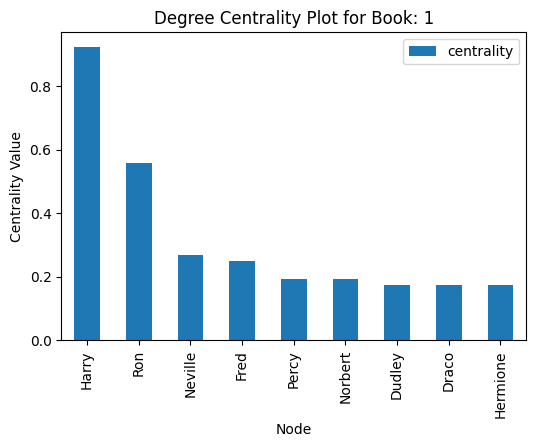

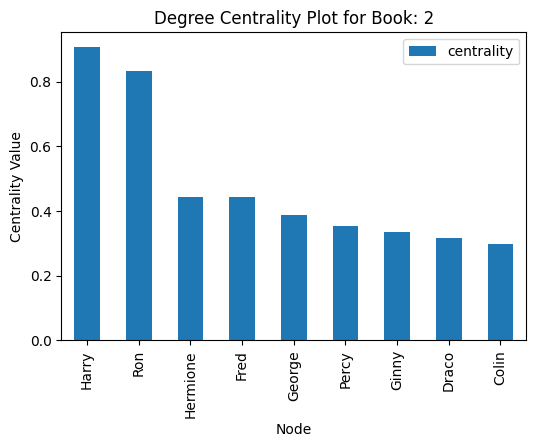

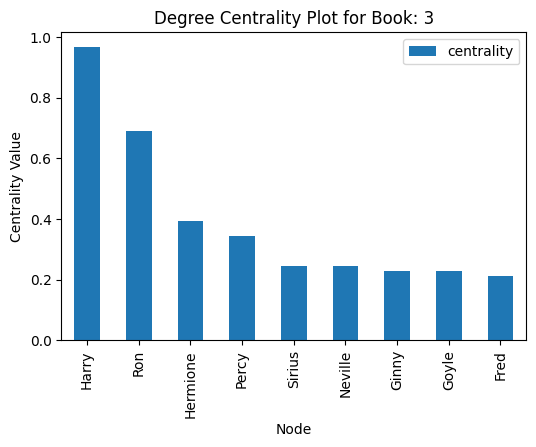

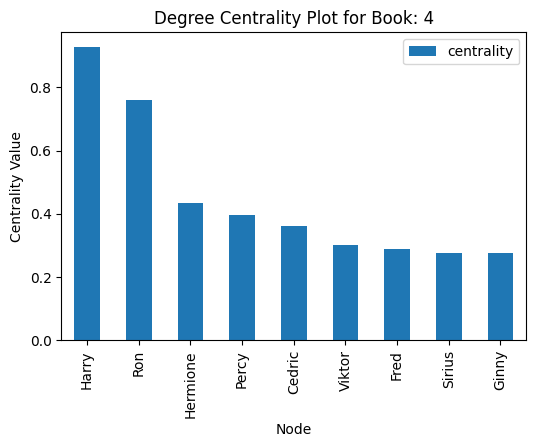

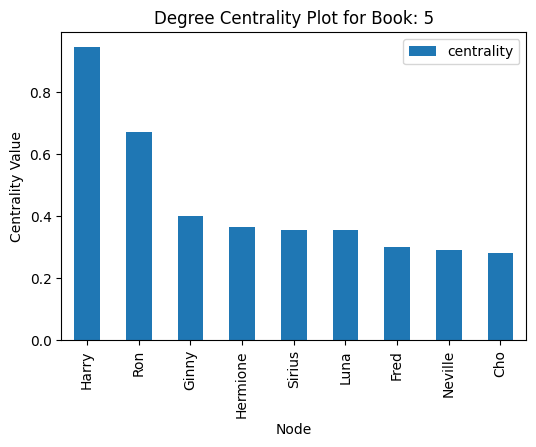

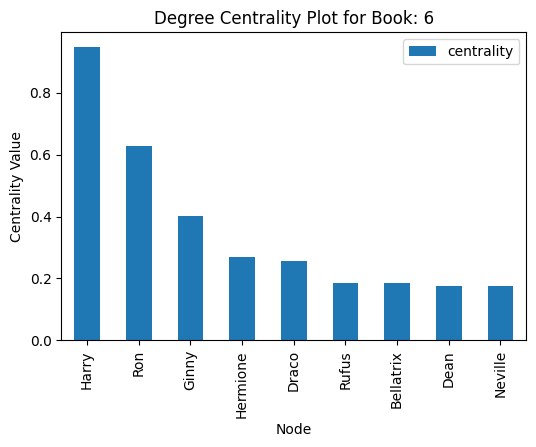

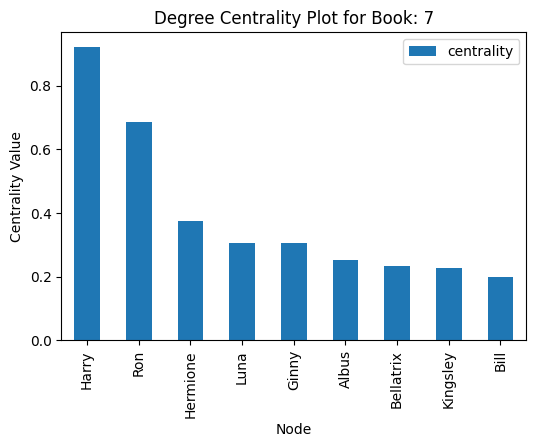

In [77]:
for key, G in graph_collection.items():
  # Degree centrality
  degree_dict = nx.degree_centrality(G)
  degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
  nx.set_node_attributes(G, degree_dict, 'degree_centrality')

  # Create a new figure and subplot for each graph
  fig, ax = plt.subplots(figsize=(6, 4))
  # Plot top 10 nodes for degree centrality
  degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar", ax=ax)

  # Set the title and labels for the plot
  ax.set_title(f'Degree Centrality Plot for Book: {key}')
  ax.set_xlabel('Node')
  ax.set_ylabel('Centrality Value')

  # Show the plot for this graph
  plt.show()

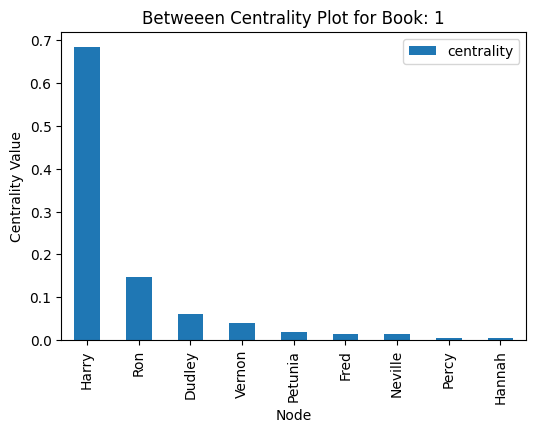

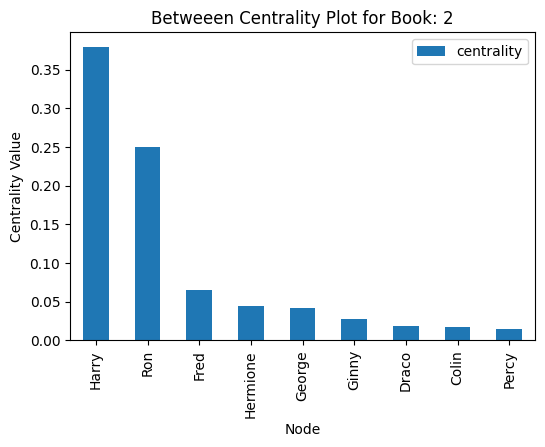

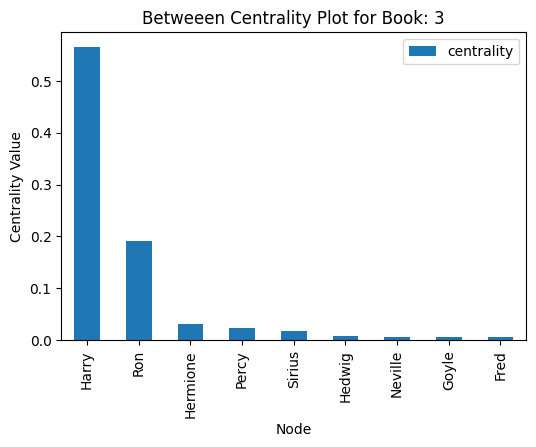

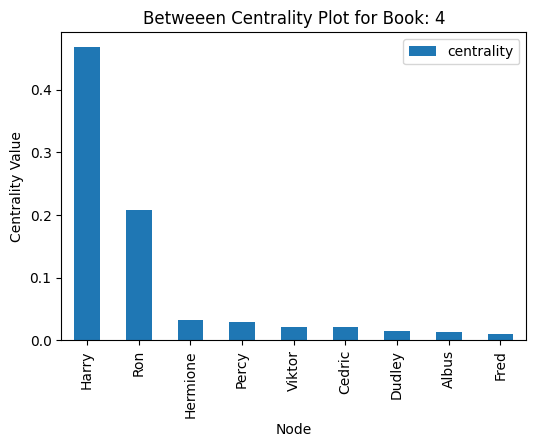

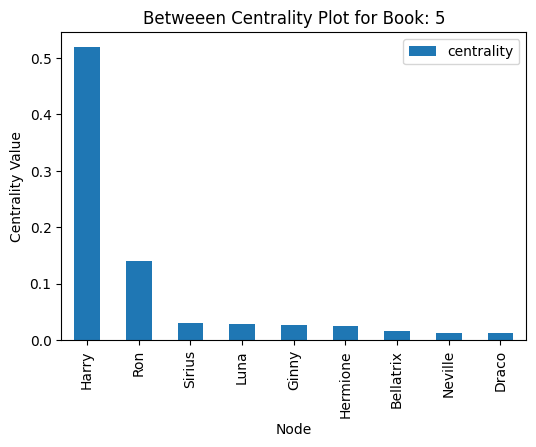

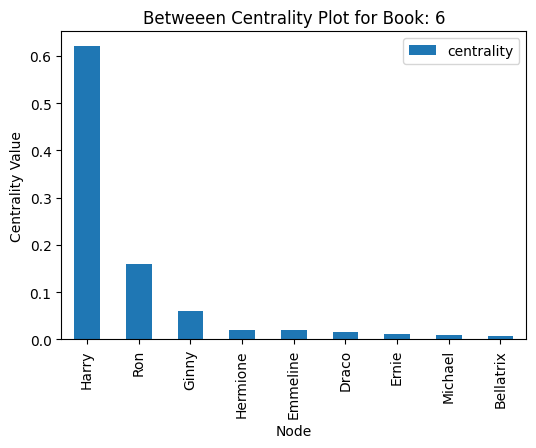

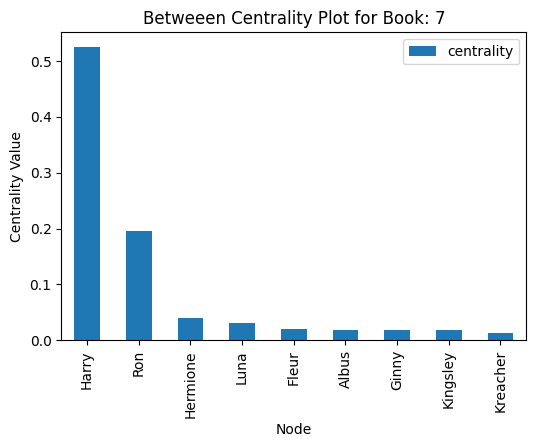

In [78]:
for key, G in graph_collection.items():
  # Betweenness centrality
  betweenness_dict = nx.betweenness_centrality(G)
  betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
  nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')

  # Create a new figure and subplot for each graph
  fig, ax = plt.subplots(figsize=(6, 4))
  # Plot top 10 nodes for degree centrality
  betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar", ax=ax)

  # Set the title and labels for the plot
  ax.set_title(f'Betweeen Centrality Plot for Book: {key}')
  ax.set_xlabel('Node')
  ax.set_ylabel('Centrality Value')

  # Show the plot for this graph
  plt.show()


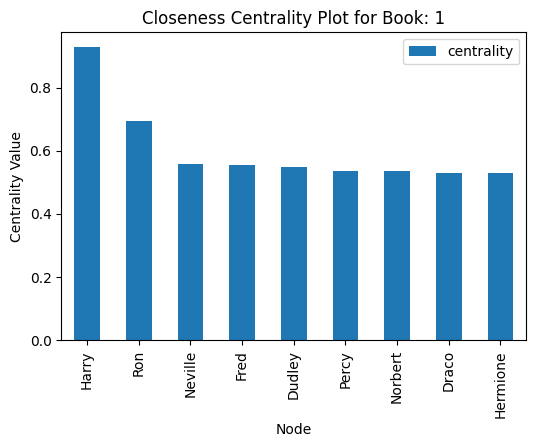

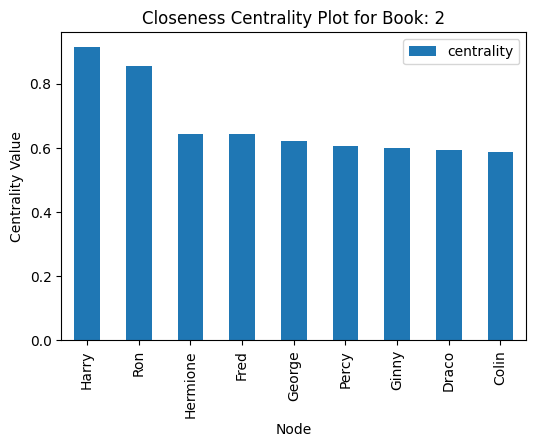

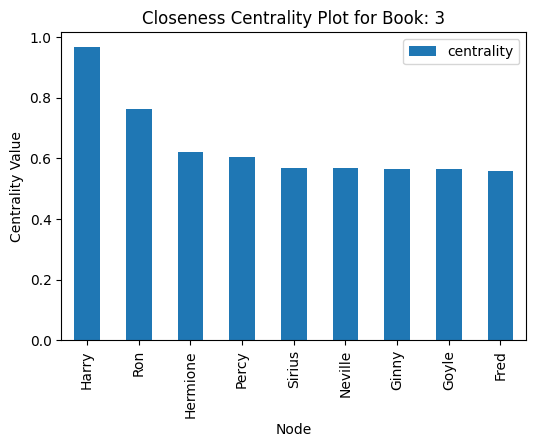

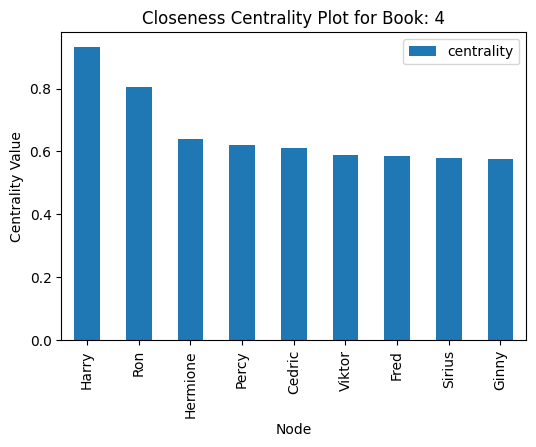

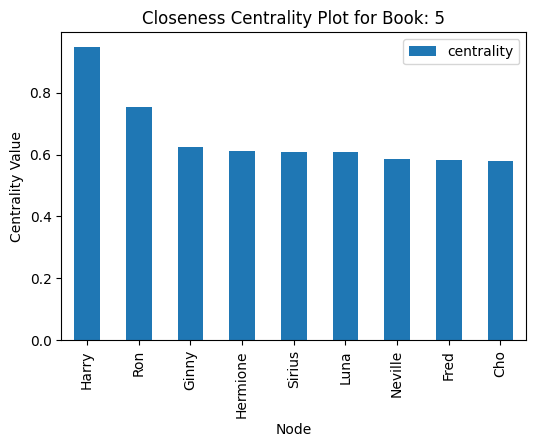

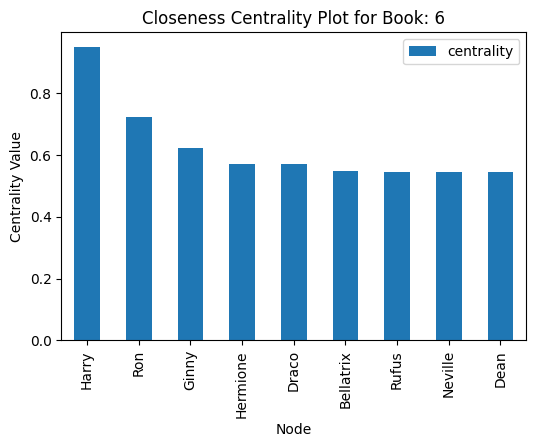

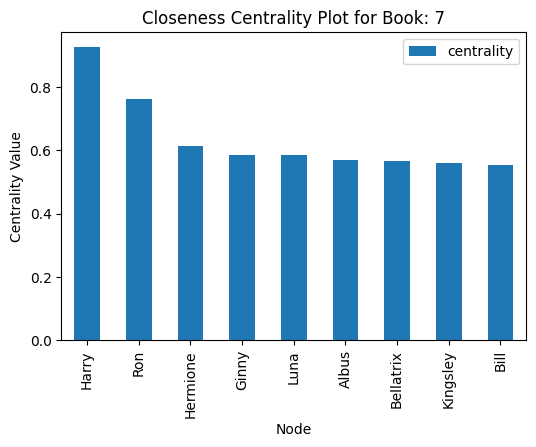

In [79]:
for key, G in graph_collection.items():
  # Closeness centrality
  closeness_dict = nx.closeness_centrality(G)
  closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
  nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

  # Create a new figure and subplot for each graph
  fig, ax = plt.subplots(figsize=(6, 4))
  # Plot top 10 nodes for degree centrality
  closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar", ax=ax)

  # Set the title and labels for the plot
  ax.set_title(f'Closeness Centrality Plot for Book: {key}')
  ax.set_xlabel('Node')
  ax.set_ylabel('Centrality Value')

  # Show the plot for this graph
  plt.show()

# Community Detection

## Using python_louvain, setup ENV

In [80]:
#We start by isntalling some useful packages
%%capture
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib

In [81]:
%%capture
!pip uninstall -y python_louvain
!pip install python_louvain

In [82]:
%%capture
!pip install cdlib

## Generate best_partitions

In [90]:
import community as community_louvain
for key, G in graph_collection.items():
  volume = key
  communities = community_louvain.best_partition(G)
  print(f"===== Community in volume {key} =====")
  # Create a new dictionary to group keys by values
  communities_dict = {}
  for key, value in communities.items():
      if value not in communities_dict:
          communities_dict[value] = [key]
      else:
          communities_dict[value].append(key)
  # Sort the grouped dictionary by the values (rank)
  sorted_communities_dict = dict(sorted(communities_dict.items()))
  # Print the grouped dictionary
  for value, keys in sorted_communities_dict.items():
      print(f"Community {value}: {keys}")
  nx.set_node_attributes(G, communities, 'group')
  com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='in_line')
  com_net.from_nx(G)
  com_net.write_html("Communities_for_book"+str(volume)+".html")

===== Community in volume 1 =====
Community 0: ['Harry', 'James', 'Minerva', 'Cornelius', 'Newt', 'Dedalus', 'Griphook', 'Bill', 'Scabbers', 'Argus', 'Parvati', 'Pansy', 'Severus']
Community 1: ['Hannah', 'Susan', 'Terry']
Community 2: ['Dudley', 'Ted', 'Petunia', 'Albus', 'Lily', 'Vernon', 'Marge', 'Dennis', 'Rubeus', 'Ginny', 'Percy']
Community 3: ['Hedwig', 'Ron', 'Neville', 'Charlie', 'Hermione', 'Crabbe', 'Goyle', 'Draco', 'Justin', 'Seamus', 'Peeves', 'Fang', 'Fluffy', 'Norbert', 'Ronan', 'Bane', 'Firenze']
Community 4: ['Fred', 'George', 'Lee', 'Dean', 'Oliver', 'Marcus', 'Angelina', 'Alicia', 'Trevor']
===== Community in volume 2 =====
Community 0: ['Ron', 'Draco', 'Errol', 'Percy', 'Bill', 'Ginny', 'Gilderoy', 'Lee', 'Seamus', 'Dean', 'Neville', 'Fang', 'Argus', 'Myrtle', 'Goyle', 'Fawkes', 'Rubeus', 'Aragog', 'Penelope']
Community 1: ['Harry', 'Vernon', 'Petunia', 'Dudley', 'Dobby', 'Albus', 'Mafalda', 'Lucius', 'Arthur', 'Scabbers', 'Severus', 'Minerva', 'Marvolo', 'Corneliu

In [91]:
for key, G in graph_collection.items():
  # For book 1, display the generated community, for other communities of other books, you can find them in the folder of runtime
  if key == '1':
    display(HTML(filename="Communities_for_book"+str(key)+".html"))

# Evolution of Characters' Importance


In [85]:
books_graph = []
for key, G in graph_collection.items():
  books_graph.append(G)

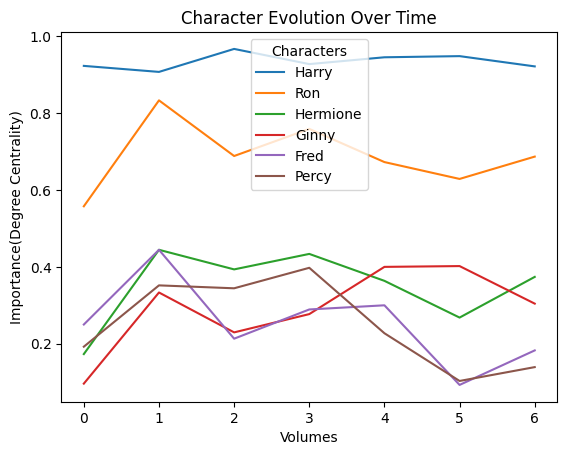

In [86]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Get character ranking based on degree_centrality
character_ranking = degree_evol_df.sum()
# Sort the character_ranking in descending order
character_ranking = character_ranking.sort_values(ascending=False)

# Plotting the degree centrality evolution of 10 main characters
top_characters = degree_evol_df[character_ranking.index[:6]]

ax = top_characters.plot()

# Add X and Y labels
ax.set_xlabel("Volumes")
ax.set_ylabel("Importance(Degree Centrality)")

# Add a title
ax.set_title("Character Evolution Over Time")

# Add a legend
ax.legend(title="Characters")

# Show the plot
plt.show()


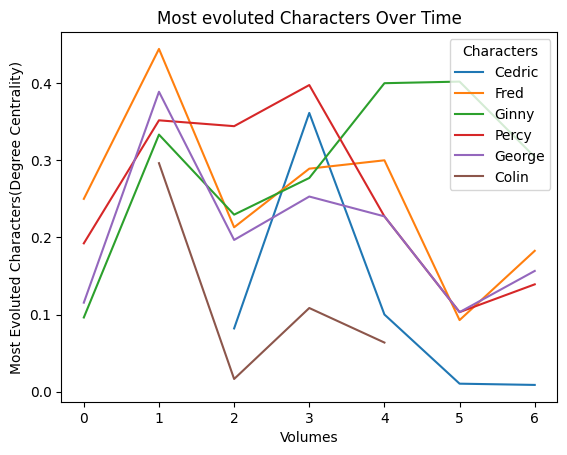

In [87]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Get character_max_evolution ranking based on changes of degree_centrality
character_max_evolution = degree_evol_df.max() - degree_evol_df.min()

# Sort the character_max_evolution in descending order
character_max_evolution = character_max_evolution.sort_values(ascending=False)

# Plotting the degree centrality evolution of 6 main evoluted characters
top_characters = degree_evol_df[character_max_evolution.index[:6]]

ax = top_characters.plot()

# Add X and Y labels
ax.set_xlabel("Volumes")
ax.set_ylabel("Most Evoluted Characters(Degree Centrality)")


# Add a title
ax.set_title("Most evoluted Characters Over Time")

# Add a legend
ax.legend(title="Characters")

# Show the plot
plt.show()

In [88]:
from google.colab import files

# 1. Upload a file to Colab (skip this step if you already have the file)
# Use the file upload dialog or fetch the file from a URL, for example:
# !wget https://example.com/path/to/your/file.txt

# 2. Download the file to your local machine
for i in range(0,7):
  files.download('Networks_for_book' + str(i+1)+'.html')  # Replace 'file.txt' with the actual file name you want to download
for i in range(0,7):
  files.download('Communities_for_book' + str(i+1)+'.html')  # Replace 'file.txt' with the actual file name you want to download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>